In [1]:
# Initial imports
import pandas as pd
import numpy as np
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\lchri\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
csv_path = Path("20210426_teamstats_df.csv")
teamstats_df = pd.read_csv(csv_path)

In [3]:
teamstats_df = teamstats_df.drop(columns=['Unnamed: 0'])
teamstats_df2 = teamstats_df.copy()

In [4]:
# dropping columns for model tuning

teamstats_df = teamstats_df.drop(columns=['H_TEAM1', 'H_TEAM2', 'GAMEDATE', 'A_TEAM1', 'A_TEAM2'])

In [5]:
teamstats_df.shape

(12738, 188)

In [6]:
teamstats_df.head()

,H_H/A,H_W/L,H_MIN,H_FGA,H_FG%,H_3PM,H_3PA,H_3P%,H_FT%,H_OREB,...,A_TEAM2_OKC,A_TEAM2_ORL,A_TEAM2_PHI,A_TEAM2_PHX,A_TEAM2_POR,A_TEAM2_SAC,A_TEAM2_SAS,A_TEAM2_TOR,A_TEAM2_UTA,A_TEAM2_WAS
0,1,1,53,92,45.7,14,28,50.0,59.3,11,...,0,0,0,0,0,0,0,0,0,0
1,1,0,48,80,46.3,10,31,32.3,84.2,7,...,0,0,0,0,0,0,0,0,0,0
2,1,1,48,82,51.2,10,32,31.3,91.7,4,...,0,0,0,0,0,0,0,0,0,0
3,1,0,63,94,38.3,6,22,27.3,67.4,15,...,0,0,0,0,0,0,0,0,0,0
4,1,0,48,68,41.2,10,29,34.5,78.9,8,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#teamstats_df.info('include=all')

In [8]:
print(teamstats_df.iloc[:,0:32])

       H_H/A  H_W/L  H_MIN  H_FGA  H_FG%  H_3PM  H_3PA  H_3P%  H_FT%  H_OREB  \
0          1      1     53     92   45.7     14     28   50.0   59.3      11   
1          1      0     48     80   46.3     10     31   32.3   84.2       7   
2          1      1     48     82   51.2     10     32   31.3   91.7       4   
3          1      0     63     94   38.3      6     22   27.3   67.4      15   
4          1      0     48     68   41.2     10     29   34.5   78.9       8   
5          1      0     48     87   42.5     15     39   38.5   63.2      14   
6          1      1     48     91   47.3     10     24   41.7   76.9      14   
7          1      0     48     77   45.5     18     39   46.2   84.4       4   
8          1      1     48     83   56.6      9     12   75.0  100.0       4   
9          1      1     48     72   44.4     13     25   52.0   82.6       8   
10         1      1     48     84   42.9     11     22   50.0   86.2      12   
11         1      1     48     75   45.3

In [9]:
#drop_teamstats_df = teamstats_df.loc[:-1, teamstats_df.columns != 'H_TEAM1']

In [10]:
#drop_teamstats_df = drop_teamstats_df.loc[:-1, teamstats_df.columns != 'H_TEAM2']

In [11]:
#drop_teamstats_df = teamstats_df.loc[:-1, teamstats_df.columns != 'A_TEAM1']

In [12]:
#drop_teamstats_df = teamstats_df.loc[:-1, teamstats_df.columns != 'A_TEAM2']

In [13]:
#drop_teamstats_df = teamstats_df.loc[:-1, teamstats_df.columns != 'GAMEDATE']

In [14]:
### drop_teamstats_df.info('include=all')

In [15]:
#print(type(drop_teamstats_df))

In [16]:
# defining 'W/L' column as feature set
X = teamstats_df.copy()
X.drop('H_W/L', axis=1, inplace=True)
X.head(16)

,H_H/A,H_MIN,H_FGA,H_FG%,H_3PM,H_3PA,H_3P%,H_FT%,H_OREB,H_DREB,...,A_TEAM2_OKC,A_TEAM2_ORL,A_TEAM2_PHI,A_TEAM2_PHX,A_TEAM2_POR,A_TEAM2_SAC,A_TEAM2_SAS,A_TEAM2_TOR,A_TEAM2_UTA,A_TEAM2_WAS
0,1,53,92,45.7,14,28,50.0,59.3,11,35,...,0,0,0,0,0,0,0,0,0,0
1,1,48,80,46.3,10,31,32.3,84.2,7,34,...,0,0,0,0,0,0,0,0,0,0
2,1,48,82,51.2,10,32,31.3,91.7,4,36,...,0,0,0,0,0,0,0,0,0,0
3,1,63,94,38.3,6,22,27.3,67.4,15,36,...,0,0,0,0,0,0,0,0,0,0
4,1,48,68,41.2,10,29,34.5,78.9,8,28,...,0,0,0,0,0,0,0,0,0,0
5,1,48,87,42.5,15,39,38.5,63.2,14,27,...,0,0,0,0,0,0,0,0,0,0
6,1,48,91,47.3,10,24,41.7,76.9,14,45,...,0,0,0,0,0,0,0,0,0,0
7,1,48,77,45.5,18,39,46.2,84.4,4,30,...,0,0,0,0,0,0,0,0,0,0
8,1,48,83,56.6,9,12,75.0,100.0,4,27,...,0,0,0,0,0,0,0,0,0,0
9,1,48,72,44.4,13,25,52.0,82.6,8,29,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Create the features (X) and target (y) sets
X = teamstats_df.iloc[:, 0:32].values
y = teamstats_df['H_W/L'].values

In [18]:
y = teamstats_df["H_W/L"].values

In [19]:
y[:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [20]:
# Creating training, validation, and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=78)

In [21]:
# Model set-up
number_input_features = 32
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 16
#hidden_nodes_layer3 = 4
#hidden_nodes_layer4 = 5
#hidden_nodes_layer5 = 5

In [22]:
# Define the LSTM RNN model
model = Sequential()

# Layer 1
model.add(
    Dense(units=hidden_nodes_layer1, 
          input_dim=number_input_features, 
          activation="relu")
)

# Layer 2
model.add(Dense(units=hidden_nodes_layer2, activation="relu"))


# Layer 3
#model.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Layer 4
#model.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Layer 5
#model.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
model.add(Dense(1, activation="sigmoid"))

In [23]:
# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc"),
    ],
)

In [24]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                660       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 1,013
Trainable params: 1,013
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Training the model
batch_size = 1000
epochs = 20
training_history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

Epoch 1/20
8/8 [==============================] - 2s 133ms/step - loss: 9.9631 - accuracy: 0.4078 - tp: 0.0000e+00 - tn: 1923.3333 - fp: 0.0000e+00 - fn: 2779.7778 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4851 - val_loss: 3.6934 - val_accuracy: 0.4228 - val_tp: 4.0000 - val_tn: 1006.0000 - val_fp: 27.0000 - val_fn: 1352.0000 - val_precision: 0.1290 - val_recall: 0.0029 - val_auc: 0.2500
Epoch 2/20
8/8 [==============================] - 0s 9ms/step - loss: 2.6996 - accuracy: 0.3831 - tp: 604.1111 - tn: 1178.8889 - fp: 747.3333 - fn: 2172.7778 - precision: 0.3689 - recall: 0.1610 - auc: 0.3062 - val_loss: 1.6164 - val_accuracy: 0.5341 - val_tp: 1259.0000 - val_tn: 17.0000 - val_fp: 1016.0000 - val_fn: 97.0000 - val_precision: 0.5534 - val_recall: 0.9285 - val_auc: 0.3924
Epoch 3/20
8/8 [==============================] - 0s 9ms/step - loss: 1.5988 - accuracy: 0.5704 - tp: 2672.2222 - tn: 16.3333 - fp: 1914.4444 - fn: 100.1111 - precision: 0.5826 - recall: 0.9594 - auc: 0.4283

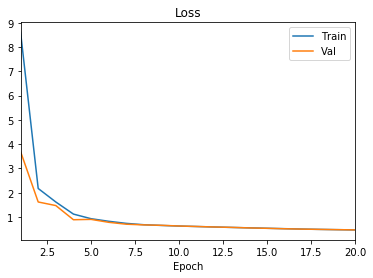

In [26]:
# Plotting loss
loss_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["loss"],
        "Val": training_history.history["val_loss"],
    }
)
loss_df.set_index("Epoch", inplace=True)
loss_df.plot(title="Loss")

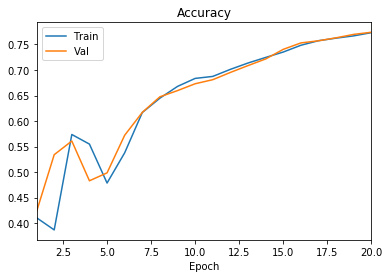

In [27]:
# Plotting accuracy
accuracy_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["accuracy"],
        "Val": training_history.history["val_accuracy"],
    }
)
accuracy_df.set_index("Epoch", inplace=True)
accuracy_df.plot(title="Accuracy")

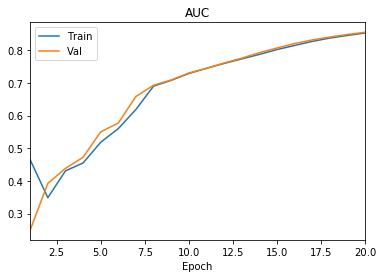

In [28]:
# Plotting AUC
auc_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["auc"],
        "Val": training_history.history["val_auc"],
    }
)
auc_df.set_index("Epoch", inplace=True)
auc_df.plot(title="AUC")

In [29]:
# Import the roc_curve and auc metrics from sklearn
from sklearn.metrics import roc_curve, auc

In [30]:
# Making predictions to feed the roc_curve module
train_predictions = model.predict(X_train, batch_size=1000)
test_predictions = model.predict(X_test, batch_size=1000)

In [31]:
# Calculate the ROC curve and AUC for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_predictions)
auc_train = auc(fpr_train, tpr_train)
auc_train = round(auc_train, 4)

# Calculate the ROC curve and AUC for the testing set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_predictions)
auc_test = auc(fpr_test, tpr_test)
auc_test = round(auc_test, 4)

In [32]:
# Create a DataFrame with the fpr and tpr results
roc_df_train = pd.DataFrame({"FPR Train": fpr_train, "TPR Train": tpr_train,})

roc_df_test = pd.DataFrame({"FPR Test": fpr_test, "TPR Test": tpr_test,})

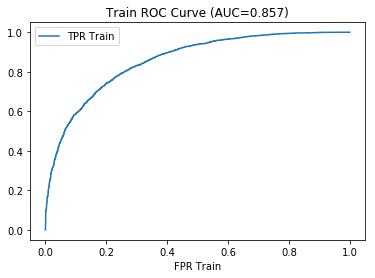

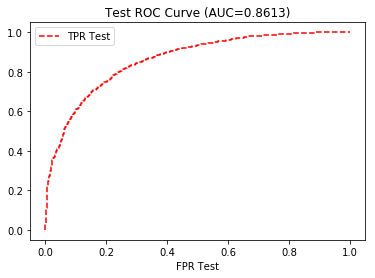

In [33]:
# Plotting the ROC Curves
roc_df_train.plot(
    x="FPR Train",
    y="TPR Train",
    xlim=([-0.05, 1.05]),
    title=f"Train ROC Curve (AUC={auc_train})",
)

roc_df_test.plot(
    x="FPR Test",
    y="TPR Test",
    color="red",
    style="--",
    xlim=([-0.05, 1.05]),
    title=f"Test ROC Curve (AUC={auc_test})",
)

In [34]:
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

# Define metrics dictionary
metrics = {k: v for k, v in zip(model.metrics_names, scores)}

# Display evaluation metrics results
display(metrics)

{'loss': 0.45595675706863403,
 'accuracy': 0.7843014001846313,
 'tp': 1535.0,
 'tn': 963.0,
 'fp': 383.0,
 'fn': 304.0,
 'precision': 0.8003128170967102,
 'recall': 0.8346927762031555,
 'auc': 0.8612384796142578}

In [35]:
# Define the confusion matrix data
cm_df = pd.DataFrame(
    {
        "Positive (1)": [f"TP={metrics['tp']}", f"FP={metrics['fn']}"],
        "Negative (0)": [f"FN={metrics['fp']}", f"TN={metrics['tn']}"],
    },
    index=["Positive(1)", "Negative(0)"],
)
cm_df.index.name = "Actual"
cm_df.columns.name = "Predicted"

# Show the confusion matrix
cm_df

Predicted,Positive (1),Negative (0)
Actual,,
Positive(1),TP=1535.0,FN=383.0
Negative(0),FP=304.0,TN=963.0


In [36]:
# Import the classification_report method from sklearn
from sklearn.metrics import classification_report

# Predict classes using testing data
y_predict_classes = model.predict_classes(X_test, batch_size=1000)

# Display classification report
print(classification_report(y_predict_classes, y_test))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1267
           1       0.83      0.80      0.82      1918

    accuracy                           0.78      3185
   macro avg       0.78      0.78      0.78      3185
weighted avg       0.79      0.78      0.79      3185



In [37]:
model.predict(X_test)

array([[0.87250435],
       [0.6020336 ],
       [0.12570235],
       ...,
       [0.94934493],
       [0.9322785 ],
       [0.10065368]], dtype=float32)

In [38]:
teamstats_df.info('include=all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12738 entries, 0 to 12737
Data columns (total 188 columns):
H_H/A           int64
H_W/L           int64
H_MIN           int64
H_FGA           int64
H_FG%           float64
H_3PM           int64
H_3PA           int64
H_3P%           float64
H_FT%           float64
H_OREB          int64
H_DREB          int64
H_AST           int64
H_TOV           int64
H_STL           int64
H_BLK           int64
H_PF            int64
A_MIN           int64
A_FGA           int64
A_FG%           float64
A_3PM           int64
A_3PA           int64
A_3P%           float64
A_FT%           float64
A_OREB          int64
A_DREB          int64
A_AST           int64
A_TOV           int64
A_STL           int64
A_BLK           int64
A_PF            int64
H_TEAM1_ATL     int64
H_TEAM1_BKN     int64
H_TEAM1_BOS     int64
H_TEAM1_CHA     int64
H_TEAM1_CHI     int64
H_TEAM1_CLE     int64
H_TEAM1_DAL     int64
H_TEAM1_DEN     int64
H_TEAM1_DET     int64
H_TEAM1_GSW     int6

In [39]:
teamstats_df2

,H_TEAM1,H_H/A,H_TEAM2,GAMEDATE,H_W/L,H_MIN,H_FGA,H_FG%,H_3PM,H_3PA,...,A_TEAM2_OKC,A_TEAM2_ORL,A_TEAM2_PHI,A_TEAM2_PHX,A_TEAM2_POR,A_TEAM2_SAC,A_TEAM2_SAS,A_TEAM2_TOR,A_TEAM2_UTA,A_TEAM2_WAS
0,ATL,1,SAS,2017-01-01,1,53,92,45.7,14,28,...,0,0,0,0,0,0,0,0,0,0
1,ATL,1,GSW,2014-01-03,0,48,80,46.3,10,31,...,0,0,0,0,0,0,0,0,0,0
2,ATL,1,IND,2020-01-04,1,48,82,51.2,10,32,...,0,0,0,0,0,0,0,0,0,0
3,ATL,1,MIA,2012-01-05,0,63,94,38.3,6,22,...,0,0,0,0,0,0,0,0,0,0
4,ATL,1,BOS,2013-01-05,0,48,68,41.2,10,29,...,0,0,0,0,0,0,0,0,0,0
5,ATL,1,NYK,2016-01-05,0,48,87,42.5,15,39,...,0,0,0,0,0,0,0,0,0,0
6,ATL,1,MIA,2019-01-06,1,48,91,47.3,10,24,...,0,0,0,0,0,0,0,0,0,0
7,ATL,1,DEN,2020-01-06,0,48,77,45.5,18,39,...,0,0,0,0,0,0,0,0,0,0
8,ATL,1,CHI,2012-01-07,1,48,83,56.6,9,12,...,0,0,0,0,0,0,0,0,0,0
9,ATL,1,MEM,2015-01-07,1,48,72,44.4,13,25,...,0,0,0,0,0,0,0,0,0,0


In [40]:
def display2(y_predict_classes, X_test):
    for g in range(len(y_predict_classes)):
        win_prob = round(y_predict_classes[g],2)
        team1 = teamstats_df2.reset_index().drop(columns = 'GAMEDATE').loc[g,'H_TEAM1']
        team2 = teamstats_df2.reset_index().drop(columns = 'GAMEDATE').loc[g,'H_TEAM2']
        W_L = teamstats_df2.reset_index().drop(columns = 'GAMEDATE').loc[g,'H_W/L']
        print(f' {team1} have a probability of {win_prob} of beating {team2}: {W_L}.')

In [41]:
import numpy as np
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression()
clf = LogisticRegression(penalty='l1', dual=False, tol=0.001, C=1.0, fit_intercept=True, 
                   intercept_scaling=1, class_weight='balanced', random_state=None, 
                   solver='liblinear', max_iter=1000, multi_class='ovr', verbose=0)

clf.fit(X_train, np.ravel(y_train))
y_pred2 = clf.predict_proba(X_test)
y_pred2 = y_pred2[:,1]

display2(y_pred2,X_test)

 ATL have a probability of 1.0 of beating  SAS: 1.
 ATL have a probability of 1.0 of beating GSW: 0.
 ATL have a probability of 0.0 of beating  IND: 1.
 ATL have a probability of 1.0 of beating MIA: 0.
 ATL have a probability of 1.0 of beating BOS: 0.
 ATL have a probability of 1.0 of beating  NYK: 0.
 ATL have a probability of 0.0 of beating  MIA: 1.
 ATL have a probability of 1.0 of beating  DEN: 0.
 ATL have a probability of 1.0 of beating CHI: 1.
 ATL have a probability of 0.0 of beating MEM: 1.
 ATL have a probability of 1.0 of beating IND: 1.
 ATL have a probability of 0.0 of beating IND: 1.
 ATL have a probability of 1.0 of beating  HOU: 0.
 ATL have a probability of 0.0 of beating  CHI: 1.
 ATL have a probability of 1.0 of beating HOU: 1.
 ATL have a probability of 0.0 of beating UTA: 1.
 ATL have a probability of 1.0 of beating WAS: 1.
 ATL have a probability of 1.0 of beating CHA: 1.
 ATL have a probability of 1.0 of beating  BKN: 0.
 ATL have a probability of 1.0 of beating 